Домашнее задание является продолжением промежуточной аттестации, в рамках которой вам необходимо будет применить один из методов градиентного бустинга для анализа данных (XGBoost, LightGBM или CatBoost).
Ваша задача — продемонстрировать умение применять методы машинного обучения, такие как градиентный бустинг, и провести сравнительный анализ алгоритмов для выбранного вами датасета.

Вы можете отправить дополненный ноутбук для аттестации, либо сделать новый, в котором будет скрипт для градиентного бустинга.

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb

df_titanic = sns.load_dataset('titanic')

df_titanic['age'].fillna(df_titanic['age'].median(), inplace=True)
df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0], inplace=True)

df_titanic.drop(['deck', 'embark_town', 'who', 'alive'], axis=1, inplace=True)

df_titanic = pd.get_dummies(df_titanic, columns=['sex', 'embarked', 'class'], drop_first=True)

X = df_titanic.drop('survived', axis=1)
y = df_titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\Женя\AppData\Local\Temp\ipykernel_11968\2450351188.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['age'].fillna(df_titanic['age'].median(), inplace=True)
C:\Users\Женя\AppData\Local\Temp\ipykernel_11968\2450351188.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [4]:

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print("XGBoost:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-Score:", f1_xgb)
print("ROC-AUC:", roc_auc_xgb)

XGBoost:
Accuracy: 0.8212290502793296
Precision: 0.7916666666666666
Recall: 0.7702702702702703
F1-Score: 0.7808219178082192
ROC-AUC: 0.8718146718146719


c:\Dev\ml\ML_Homework\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:10:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [5]:


lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1])

print("LightGBM:")
print("Accuracy:", accuracy_lgb)
print("Precision:", precision_lgb)
print("Recall:", recall_lgb)
print("F1-Score:", f1_lgb)
print("ROC-AUC:", roc_auc_lgb)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [10]:

from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(silent=True)
cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_test)

accuracy_cat = accuracy_score(y_test, y_pred_cat)
precision_cat = precision_score(y_test, y_pred_cat)
recall_cat = recall_score(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat)
roc_auc_cat = roc_auc_score(y_test, cat_model.predict_proba(X_test)[:, 1])

print("CatBoost:")
print("Accuracy:", accuracy_cat)
print("Precision:", precision_cat)
print("Recall:", recall_cat)
print("F1-Score:", f1_cat)
print("ROC-AUC:", roc_auc_cat)

CatBoost:
Accuracy: 0.8324022346368715
Precision: 0.8548387096774194
Recall: 0.7162162162162162
F1-Score: 0.7794117647058824
ROC-AUC: 0.8938223938223938


In [11]:
results = {
    'Model': ['XGBoost', 'LightGBM', 'CatBoost'],
    'Accuracy': [accuracy_xgb, accuracy_lgb, accuracy_cat],
    'Precision': [precision_xgb, precision_lgb, precision_cat],
    'Recall': [recall_xgb, recall_lgb, recall_cat],
    'F1-Score': [f1_xgb, f1_lgb, f1_cat],
    'ROC-AUC': [roc_auc_xgb, roc_auc_lgb, roc_auc_cat]
}

results_df = pd.DataFrame(results)
print(results_df)

      Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0   XGBoost  0.821229   0.791667  0.770270  0.780822  0.871815
1  LightGBM  0.837989   0.816901  0.783784  0.800000  0.889961
2  CatBoost  0.832402   0.854839  0.716216  0.779412  0.893822


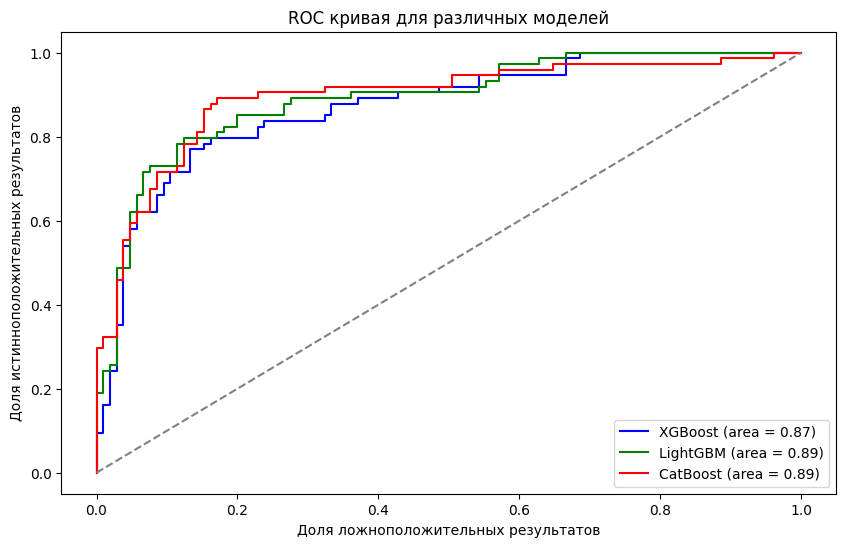

In [12]:

plt.figure(figsize=(10, 6))

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_xgb, tpr_xgb, color='blue', label='XGBoost (area = %0.2f)' % roc_auc_xgb)

fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_lgb, tpr_lgb, color='green', label='LightGBM (area = %0.2f)' % roc_auc_lgb)

fpr_cat, tpr_cat, _ = roc_curve(y_test, cat_model.predict_proba(X_test)[:, 1])
plt.plot(fpr_cat, tpr_cat, color='red', label='CatBoost (area = %0.2f)' % roc_auc_cat)

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('Доля ложноположительных результатов')
plt.ylabel('Доля истинноположительных результатов')
plt.title('ROC кривая для различных моделей')
plt.legend(loc='lower right')
plt.show()